**Cifar-100**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping

Wczytanie danych cifar-100

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

169001437/169001437 [==============================] - 3s 0us/step


Wizualizacja danych

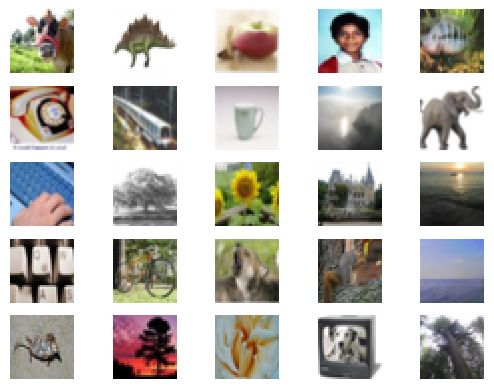

In [ ]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(x_train[i])
  plt.axis('off')
plt.show()

Wstępne przetwarzanie danych

In [ ]:
x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
number_of_classes = len(np.unique(y_train))
y_train, y_test = to_categorical(y_train, number_of_classes), to_categorical(y_test, number_of_classes)
number_of_classes

100

Model oparty na sieciach konwolucyjnych, z dodatkową augmentacją danych oraz warunkiem 'early stop'

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.regularizers import l2

In [ ]:
model = Sequential([
    Conv2D(128, (3, 3), padding='same', input_shape=x_train.shape[1:], activation='elu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(128, (3, 3), activation='elu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), padding='same', activation='elu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(512, (3, 3), padding='same', activation='elu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(1024, activation='elu'),
    Dropout(0.5),
    Dense(number_of_classes, activation='softmax'),
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

data_generator = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center = False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    rotation_range=0
)

data_generator.fit(x_train)

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=8, restore_best_weights=True)

model.fit(
    data_generator.flow(x_train, y_train, batch_size=50),
    steps_per_epoch=x_train.shape[0]//50,
    epochs=25,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stop]
    )

Epoch 1/25
1000/1000 [==============================] - 40s 38ms/step - loss: 3.7691 - accuracy: 0.1276 - val_loss: 3.1280 - val_accuracy: 0.2367
Epoch 2/25
1000/1000 [==============================] - 37s 37ms/step - loss: 3.1947 - accuracy: 0.2261 - val_loss: 2.6774 - val_accuracy: 0.3294
Epoch 3/25
1000/1000 [==============================] - 38s 38ms/step - loss: 2.9918 - accuracy: 0.2691 - val_loss: 2.6068 - val_accuracy: 0.3401
Epoch 4/25
1000/1000 [==============================] - 37s 37ms/step - loss: 2.8986 - accuracy: 0.2882 - val_loss: 2.7148 - val_accuracy: 0.3310
Epoch 5/25
1000/1000 [==============================] - 36s 36ms/step - loss: 2.8317 - accuracy: 0.3008 - val_loss: 2.4371 - val_accuracy: 0.3805
Epoch 6/25
1000/1000 [==============================] - 37s 37ms/step - loss: 2.7937 - accuracy: 0.3113 - val_loss: 2.3355 - val_accuracy: 0.4030
Epoch 7/25
1000/1000 [==============================] - 36s 36ms/step - loss: 2.7621 - accuracy: 0.3161 - val_loss: 2.4730 -

In [ ]:
model.fit(
    data_generator.flow(x_train, y_train, batch_size=50),
    steps_per_epoch=x_train.shape[0]//50,
    epochs=25,
    validation_data=(x_test, y_test),
    verbose=1,
    callbacks=[early_stop]
    )

Epoch 1/25
1000/1000 [==============================] - 38s 38ms/step - loss: 2.7276 - accuracy: 0.3577 - val_loss: 2.2319 - val_accuracy: 0.4364
Epoch 2/25
1000/1000 [==============================] - 38s 38ms/step - loss: 2.7294 - accuracy: 0.3578 - val_loss: 2.1855 - val_accuracy: 0.4382
Epoch 3/25
1000/1000 [==============================] - 37s 37ms/step - loss: 2.7491 - accuracy: 0.3589 - val_loss: 2.1991 - val_accuracy: 0.4404
Epoch 4/25
1000/1000 [==============================] - 39s 39ms/step - loss: 2.7490 - accuracy: 0.3590 - val_loss: 2.1781 - val_accuracy: 0.4387
Epoch 5/25
1000/1000 [==============================] - 38s 37ms/step - loss: 2.7503 - accuracy: 0.3608 - val_loss: 2.2149 - val_accuracy: 0.4309
Epoch 6/25
1000/1000 [==============================] - 38s 38ms/step - loss: 2.7718 - accuracy: 0.3574 - val_loss: 2.1318 - val_accuracy: 0.4486
Epoch 7/25
1000/1000 [==============================] - 36s 36ms/step - loss: 2.7827 - accuracy: 0.3553 - val_loss: 2.1451 -

In [ ]:
y_prediction = model.predict(x_test)
y_prediction_classes = np.argmax(y_prediction, axis=1)
y_true = np.argmax(y_test, axis=1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

conf_matrix = confusion_matrix(y_true, y_prediction_classes)
print('Macierz pomyłek:')
print(conf_matrix)
print('\n')

# class_report = classification_report(y_true, y_prediction_classes)
# print('Raport kalsyfikacyjny:')
# print(class_report)

313/313 [==============================] - 2s 5ms/step - loss: 2.1318 - accuracy: 0.4486

Test accuracy: 0.44859999418258667
Macierz pomyłek:
[[69  0  0 ...  0  0  0]
 [ 0 44  0 ...  0  0  0]
 [ 0  0 23 ...  0  1  0]
 ...
 [ 0  0  0 ... 48  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0 36]]




Modele oprate o transfer learning - MobileNetV2

In [ ]:
from tensorflow.keras.applications import efficientnet, MobileNetV2
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train, x_test = x_train.astype('float32'), x_test.astype('float32')
x_train, x_test = x_train/255.0, x_test/255.0

In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

base_model.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(100, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 79s 34ms/step - loss: 4.3683 - accuracy: 0.0698 - val_loss: 4.5312 - val_accuracy: 0.0242
Epoch 2/30
1563/1563 [==============================] - 48s 31ms/step - loss: 3.5158 - accuracy: 0.1819 - val_loss: 3.5817 - val_accuracy: 0.1895
Epoch 3/30
1563/1563 [==============================] - 50s 32ms/step - loss: 3.0161 - accuracy: 0.2615 - val_loss: 2.7580 - val_accuracy: 0.3184
Epoch 4/30
1563/1563 [==============================] - 48s 30ms/step - loss: 2.6711 - accuracy: 0.3261 - val_loss: 2.4677 - val_accuracy: 0.3674
Epoch 5/30
1563/1563 [==============================] - 49s 31ms/step - loss: 2.4105 - accuracy: 0.3794 - val_loss: 2.2675 - val_accuracy: 0.4159
Epoch 6/30
1563/1563 [==============================] - 49s 31ms/step - loss: 2.2045 - accuracy: 0.4204 - val_loss: 2.0818 - val_accuracy: 0.4550
Epoch 7/30
1563/1563 [==============================] - 48s 31ms/step - loss: 2.0473 - accuracy: 0.4553 - val_loss: 2.0415 -

In [ ]:
y_prediction = model.predict(x_test)
y_prediction_classes = np.argmax(y_prediction, axis=1)
y_true = np.argmax(y_test, axis=1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

conf_matrix = confusion_matrix(y_true, y_prediction_classes)
print('Macierz pomyłek:')
print(conf_matrix)
print('\n')

# class_report = classification_report(y_true, y_prediction_classes)
# print('Raport kalsyfikacyjny:')
# print(class_report)

313/313 [==============================] - 2s 7ms/step - loss: 1.9329 - accuracy: 0.5449

Test accuracy: 0.5449000000953674
Macierz pomyłek:
[[102  96 101 ...  89 124  90]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]




In [ ]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers[:-20]:
    layer.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(100, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 76s 34ms/step - loss: 3.5700 - accuracy: 0.1539 - val_loss: 4.4141 - val_accuracy: 0.1245
Epoch 2/30
1563/1563 [==============================] - 52s 33ms/step - loss: 2.8131 - accuracy: 0.2793 - val_loss: 3.7634 - val_accuracy: 0.2277
Epoch 3/30
1563/1563 [==============================] - 51s 33ms/step - loss: 2.5197 - accuracy: 0.3368 - val_loss: 3.4836 - val_accuracy: 0.2755
Epoch 4/30
1563/1563 [==============================] - 51s 33ms/step - loss: 2.3400 - accuracy: 0.3759 - val_loss: 3.8687 - val_accuracy: 0.2486
Epoch 5/30
1563/1563 [==============================] - 52s 33ms/step - loss: 2.1895 - accuracy: 0.4082 - val_loss: 3.4071 - val_accuracy: 0.2938
Epoch 6/30
1563/1563 [==============================] - 51s 33ms/step - loss: 2.0796 - accuracy: 0.4338 - val_loss: 2.8790 - val_accuracy: 0.3501
Epoch 7/30
1563/1563 [==============================] - 51s 33ms/step - loss: 1.9642 - accuracy: 0.4623 - val_loss: 2.5497 -

In [ ]:
y_prediction = model.predict(x_test)
y_prediction_classes = np.argmax(y_prediction, axis=1)
y_true = np.argmax(y_test, axis=1)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

conf_matrix = confusion_matrix(y_true, y_prediction_classes)
print('Macierz pomyłek:')
print(conf_matrix)
print('\n')

# class_report = classification_report(y_true, y_prediction_classes)
# print('Raport kalsyfikacyjny:')
# print(class_report)

313/313 [==============================] - 3s 10ms/step - loss: 2.1903 - accuracy: 0.4890

Test accuracy: 0.48899999260902405
Macierz pomyłek:
[[ 88 120  42 ... 129 191 121]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]




Model oparty o transfer learning - Xception

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import Xception

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train_resized = tf.image.resize(x_train, [75, 75])
x_test_resized = tf.image.resize(x_test, [75, 75])

In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

base_model.trainable = True

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(100, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_resized, y_train, epochs=7, validation_data=(x_test_resized, y_test))

83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/30
1563/1563 [==============================] - 168s 89ms/step - loss: 2.3684 - accuracy: 0.3936 - val_loss: 1.9590 - val_accuracy: 0.4873
Epoch 2/30
1563/1563 [==============================] - 138s 88ms/step - loss: 1.4844 - accuracy: 0.5846 - val_loss: 1.6567 - val_accuracy: 0.5630
Epoch 3/30
1563/1563 [==============================] - 138s 88ms/step - loss: 1.1442 - accuracy: 0.6705 - val_loss: 1.4494 - val_accuracy: 0.6135
Epoch 4/30
1563/1563 [==============================] - 134s 86ms/step - loss: 0.9123 - accuracy: 0.7312 - val_loss: 1.4622 - val_accuracy: 0.6158
Epoch 5/30
1563/1563 [==============================] - 138s 88ms/step - loss: 0.7355 - accuracy: 0.7789 - val_loss: 1.4268 - val_accuracy: 0.6350
Epoch 6/30
1563/1563 [==============================] - 138s 88ms/step - loss: 0.5893 - accuracy: 0.8206 - val_loss: 1.3696 - val_accuracy: 0.6592
Epoch 7/30
1563/1563 [==============================]

In [ ]:
y_prediction = model.predict(x_test_resized)
y_prediction_classes = np.argmax(y_prediction, axis=1)
y_true = np.argmax(y_test, axis=1)

test_loss, test_acc = model.evaluate(x_test_resized, y_test)
print(f'\nTest accuracy: {test_acc}')

conf_matrix = confusion_matrix(y_true, y_prediction_classes)
print('Macierz pomyłek:')
print(conf_matrix)
print('\n')

# class_report = classification_report(y_true, y_prediction_classes)
# print('Raport kalsyfikacyjny:')
# print(class_report)

313/313 [==============================] - 7s 22ms/step - loss: 1.8052 - accuracy: 0.6807

Test accuracy: 0.6807000041007996
Macierz pomyłek:
[[105 132  49 ...  89 111 106]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]




**California housing**

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sb
import pandas as pd

Wczytanie danych California Housing

In [ ]:
data = fetch_california_housing(as_frame=True)

x_california_train, x_california_test, y_california_train, y_california_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=42)
data.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


Przedstawienie i analiza danych:

Histogramy

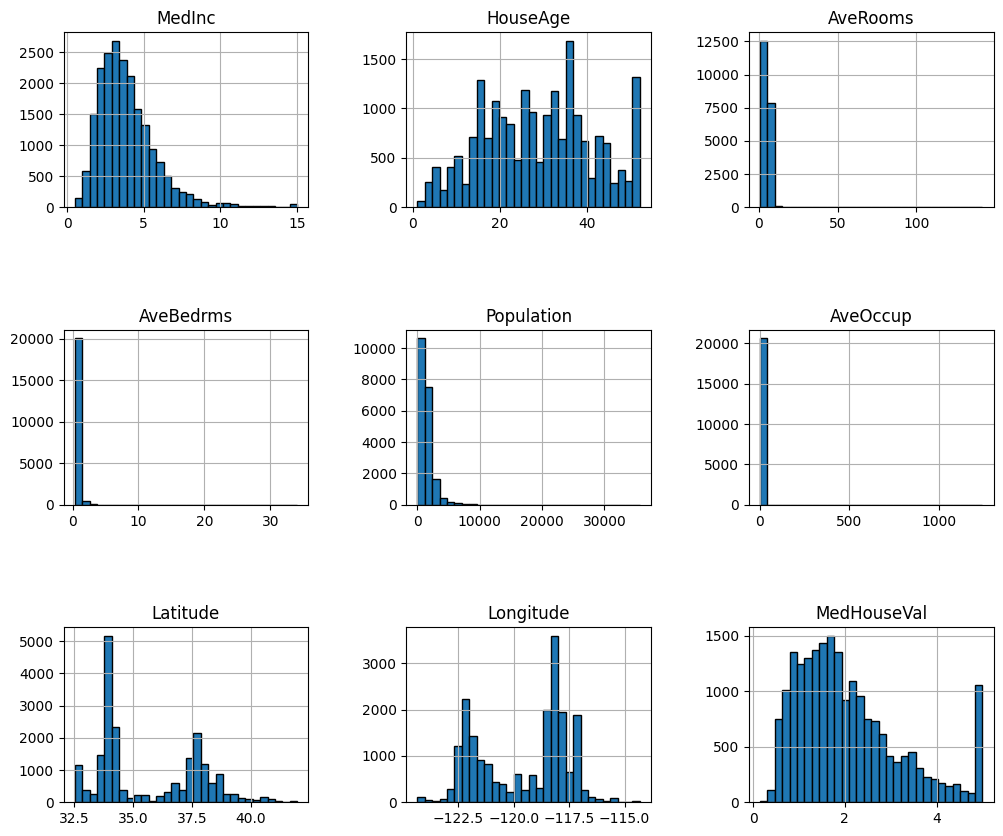

In [ ]:
data.frame.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

Przedstawienie zależności położenia od ceny

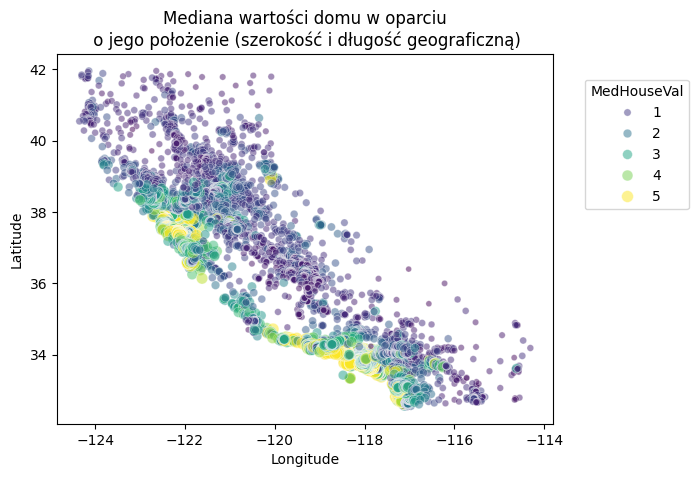

In [ ]:
sb.scatterplot(
    data=data.frame,
    x="Longitude",
    y="Latitude",
    size="MedHouseVal",
    hue="MedHouseVal",
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("Mediana wartości domu w oparciu\n o jego położenie (szerokość i długość geograficzną)")

Macierz korelacji

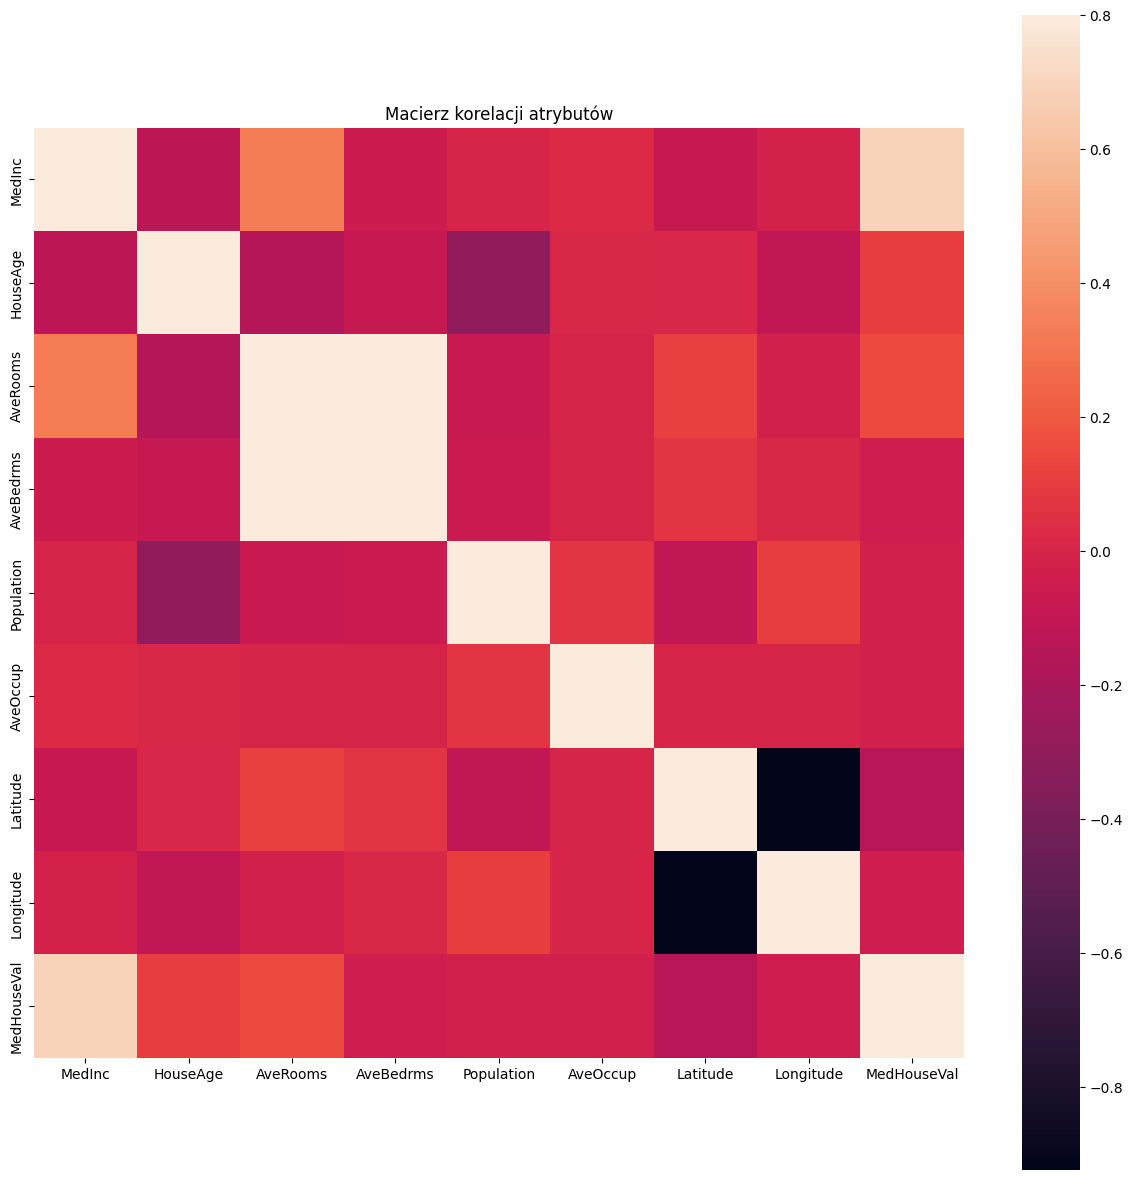

In [ ]:
corr_matrix = data.frame.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(corr_matrix, vmax = .8, square = True)
plt.title("Macierz korelacji atrybutów")
plt.show()

Zależności wybranych atrybutów od ceny

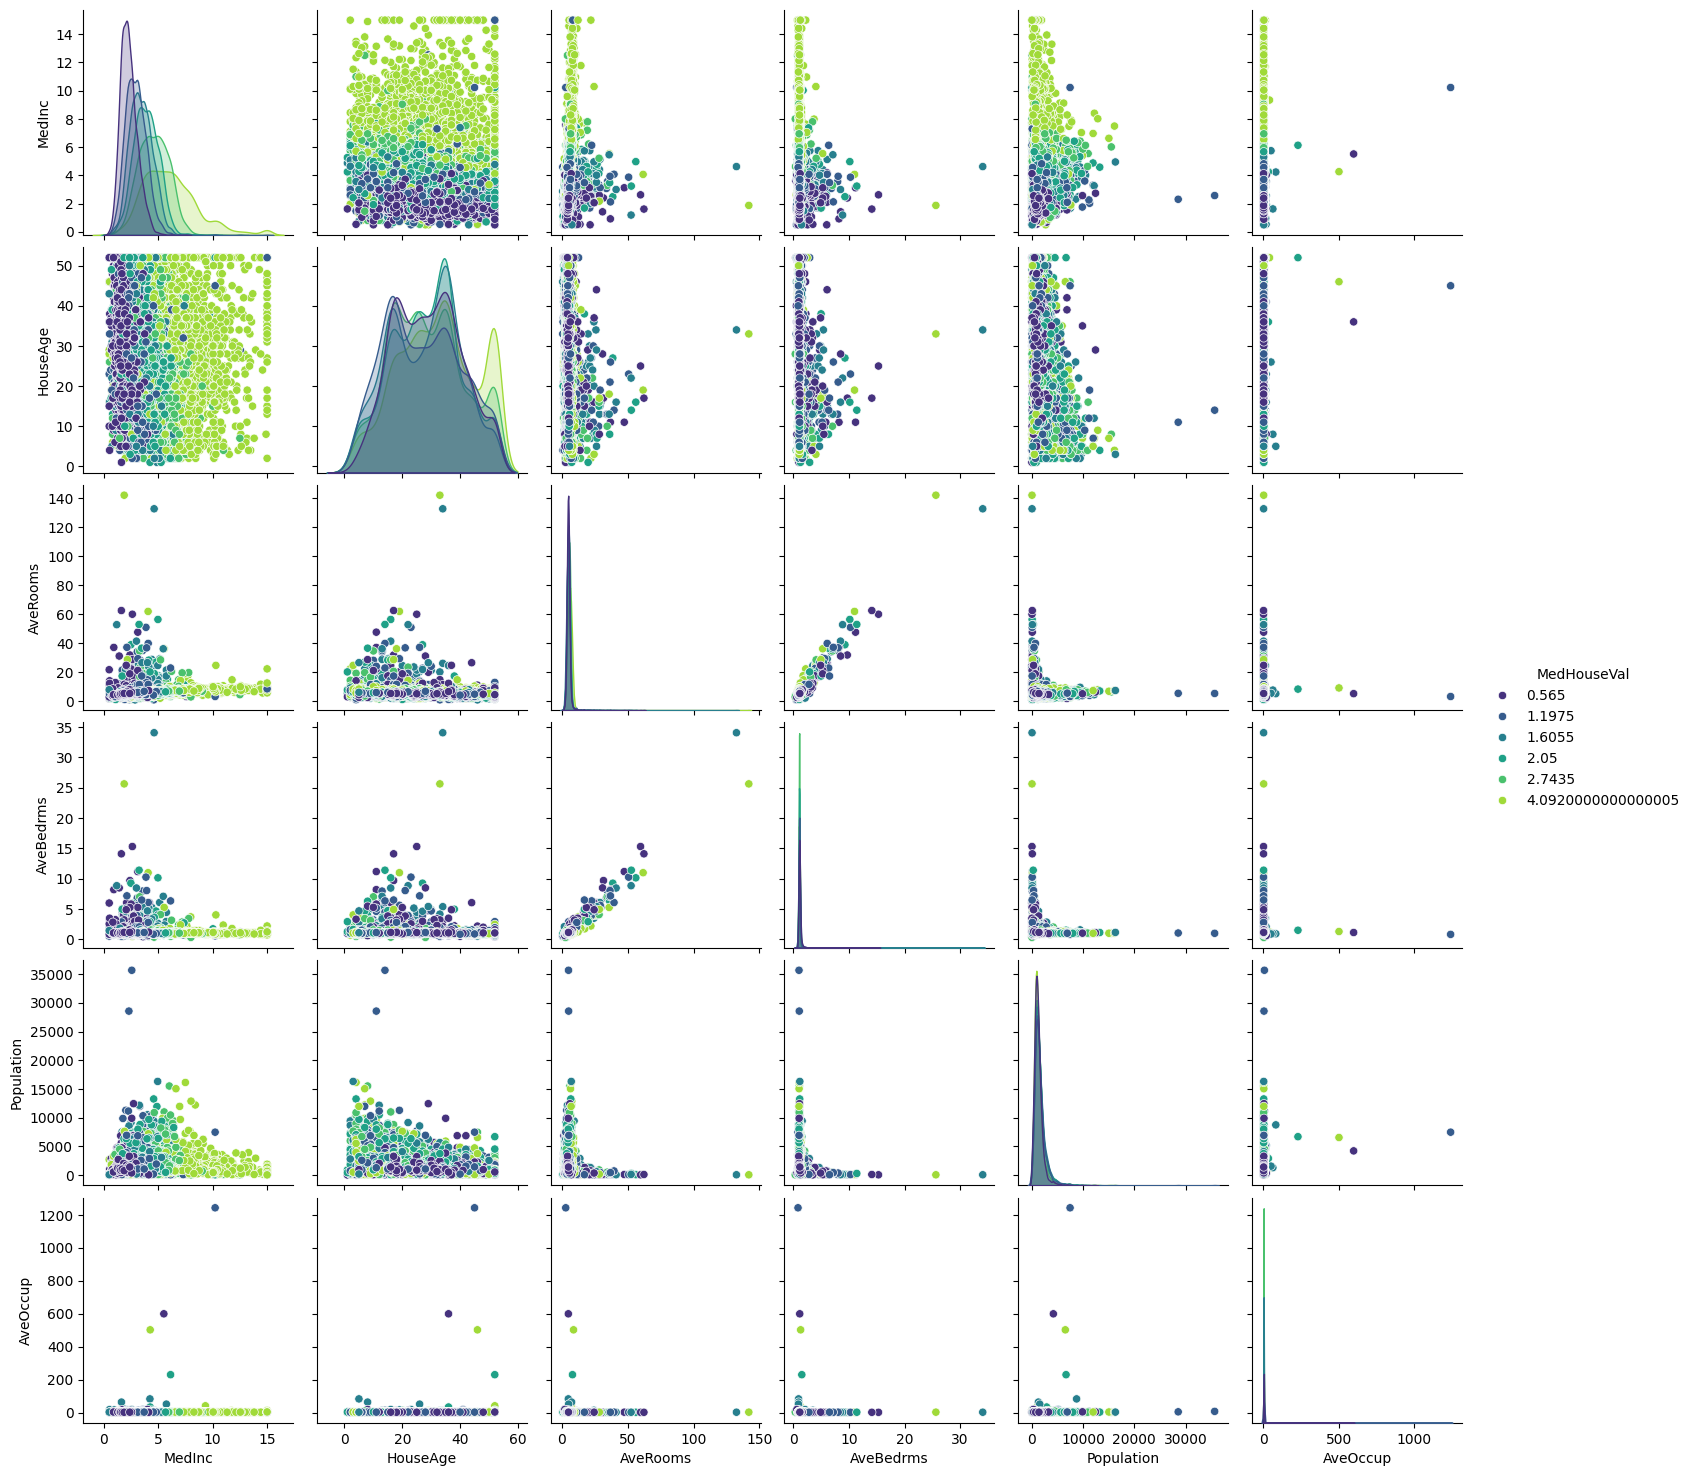

In [ ]:
columns_drop = ["Longitude", "Latitude"]
subset = data.frame.iloc[:].drop(columns=columns_drop)

subset["MedHouseVal"] = pd.qcut(subset["MedHouseVal"], 6, retbins=False)
subset["MedHouseVal"] = subset["MedHouseVal"].apply(lambda x: x.mid)
sb.pairplot(data=subset, hue="MedHouseVal", palette="viridis")

Normalizacja danych

In [ ]:
scaler = StandardScaler()
x_california_train = scaler.fit_transform(x_california_train)
x_california_test = scaler.transform(x_california_test)
y_california_test[0]

4.526

Model sieci neuronowej

In [ ]:
model = Sequential([
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

rmse = tf.keras.metrics.RootMeanSquaredError()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', rmse])

history = model.fit(
    x_california_train,
    y_california_train,
    validation_data=(x_california_test, y_california_test),
    epochs = 20, batch_size=16)

model.summary()

Epoch 1/20
1032/1032 [==============================] - 8s 5ms/step - loss: 0.5503 - mean_absolute_error: 0.5187 - root_mean_squared_error: 0.7418 - val_loss: 0.3857 - val_mean_absolute_error: 0.4426 - val_root_mean_squared_error: 0.6210
Epoch 2/20
1032/1032 [==============================] - 4s 4ms/step - loss: 0.4022 - mean_absolute_error: 0.4476 - root_mean_squared_error: 0.6342 - val_loss: 0.3806 - val_mean_absolute_error: 0.4246 - val_root_mean_squared_error: 0.6170
Epoch 3/20
1032/1032 [==============================] - 4s 4ms/step - loss: 0.3700 - mean_absolute_error: 0.4282 - root_mean_squared_error: 0.6083 - val_loss: 0.3561 - val_mean_absolute_error: 0.4372 - val_root_mean_squared_error: 0.5967
Epoch 4/20
1032/1032 [==============================] - 4s 3ms/step - loss: 0.3574 - mean_absolute_error: 0.4129 - root_mean_squared_error: 0.5978 - val_loss: 0.3354 - val_mean_absolute_error: 0.3835 - val_root_mean_squared_error: 0.5792
Epoch 5/20
1032/1032 [==========================

Wizualizacja wyników

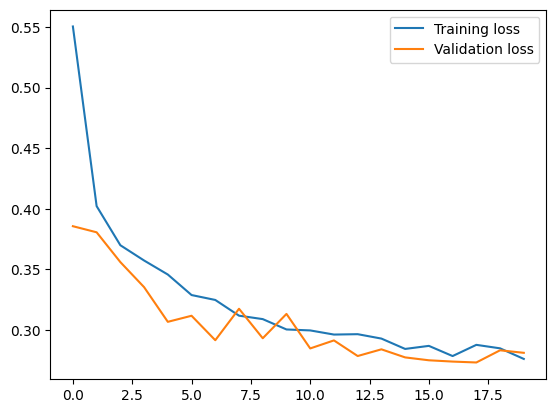

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.show()

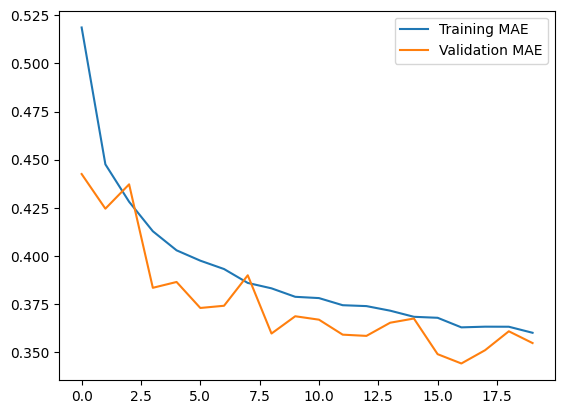

In [ ]:
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.legend()
plt.show()

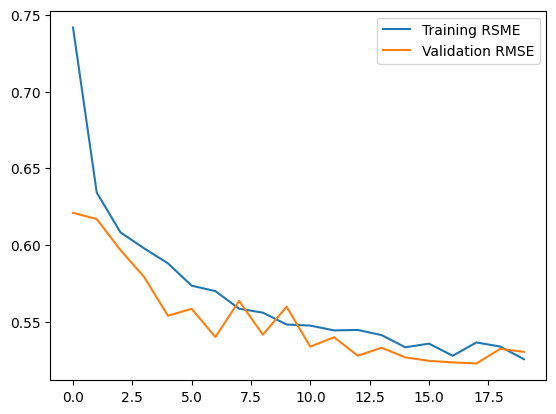

In [ ]:
plt.plot(rmse, label='Training RSME')
plt.plot(val_rmse, label='Validation RMSE')
plt.legend()
plt.show()

Przeprowadzanie predykcji i wizualizacja wyników

129/129 [==============================] - 0s 2ms/step
MAE: 0.3547901520672579
MSE: 0.281291878647357
RMSE: 0.5303695679876034
VarScore: 0.7897725121876026


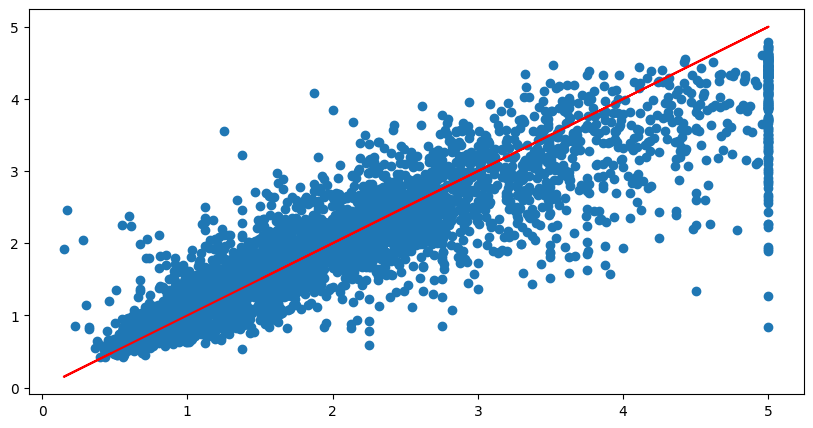

In [ ]:
y_pred = model.predict(x_california_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_california_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_california_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_california_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_california_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_california_test,y_pred)
# Perfect predictions
plt.plot(y_california_test,y_california_test,'r')

In [ ]:
model = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

rmse = tf.keras.metrics.RootMeanSquaredError()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', rmse])

history = model.fit(x_california_train, y_california_train, validation_data=(x_california_test, y_california_test), epochs = 20, batch_size=16)

model.summary()

Epoch 1/20
1032/1032 [==============================] - 8s 6ms/step - loss: 0.6325 - mean_absolute_error: 0.5483 - root_mean_squared_error: 0.7953 - val_loss: 0.4277 - val_mean_absolute_error: 0.4442 - val_root_mean_squared_error: 0.6540
Epoch 2/20
1032/1032 [==============================] - 7s 6ms/step - loss: 0.4325 - mean_absolute_error: 0.4660 - root_mean_squared_error: 0.6577 - val_loss: 0.4181 - val_mean_absolute_error: 0.4427 - val_root_mean_squared_error: 0.6466
Epoch 3/20
1032/1032 [==============================] - 4s 4ms/step - loss: 0.3953 - mean_absolute_error: 0.4446 - root_mean_squared_error: 0.6287 - val_loss: 0.3376 - val_mean_absolute_error: 0.3983 - val_root_mean_squared_error: 0.5810
Epoch 4/20
1032/1032 [==============================] - 4s 4ms/step - loss: 0.3705 - mean_absolute_error: 0.4253 - root_mean_squared_error: 0.6087 - val_loss: 0.3202 - val_mean_absolute_error: 0.3823 - val_root_mean_squared_error: 0.5659
Epoch 5/20
1032/1032 [==========================

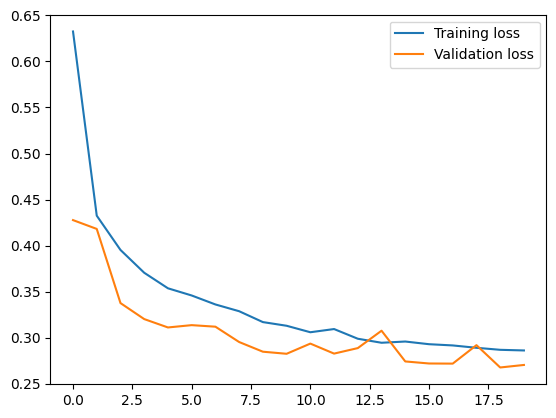

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.show()

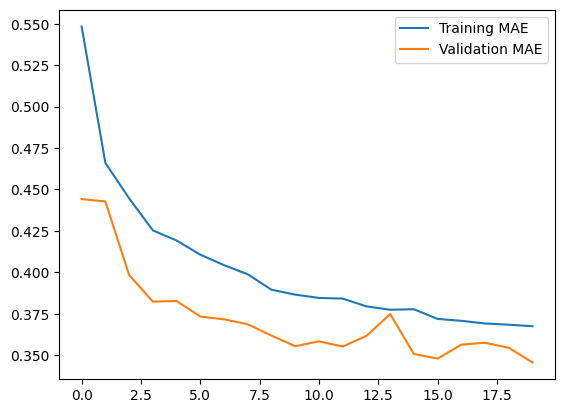

In [ ]:
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.legend()
plt.show()

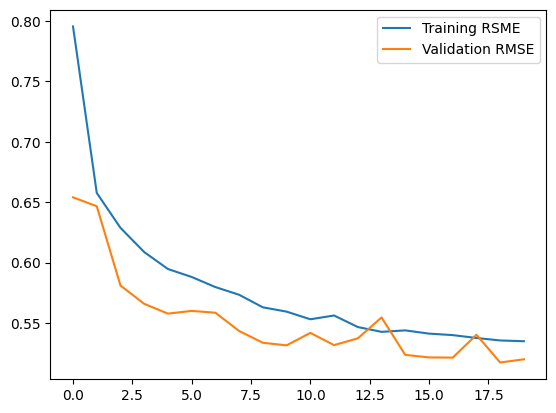

In [ ]:
plt.plot(rmse, label='Training RSME')
plt.plot(val_rmse, label='Validation RMSE')
plt.legend()
plt.show()

In [ ]:
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dense(1, activation='linear')
])

rmse = tf.keras.metrics.RootMeanSquaredError()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error', rmse])

history = model.fit(x_california_train, y_california_train, validation_data=(x_california_test, y_california_test), epochs = 20, batch_size=16)

model.summary()

Epoch 1/20
1032/1032 [==============================] - 6s 4ms/step - loss: 0.7737 - mean_absolute_error: 0.5590 - root_mean_squared_error: 0.8796 - val_loss: 0.4072 - val_mean_absolute_error: 0.4626 - val_root_mean_squared_error: 0.6381
Epoch 2/20
1032/1032 [==============================] - 4s 4ms/step - loss: 0.4506 - mean_absolute_error: 0.4775 - root_mean_squared_error: 0.6713 - val_loss: 0.3989 - val_mean_absolute_error: 0.4305 - val_root_mean_squared_error: 0.6316
Epoch 3/20
1032/1032 [==============================] - 4s 4ms/step - loss: 0.4040 - mean_absolute_error: 0.4522 - root_mean_squared_error: 0.6356 - val_loss: 0.3537 - val_mean_absolute_error: 0.4002 - val_root_mean_squared_error: 0.5947
Epoch 4/20
1032/1032 [==============================] - 4s 4ms/step - loss: 0.3771 - mean_absolute_error: 0.4323 - root_mean_squared_error: 0.6141 - val_loss: 0.3305 - val_mean_absolute_error: 0.4015 - val_root_mean_squared_error: 0.5749
Epoch 5/20
1032/1032 [==========================

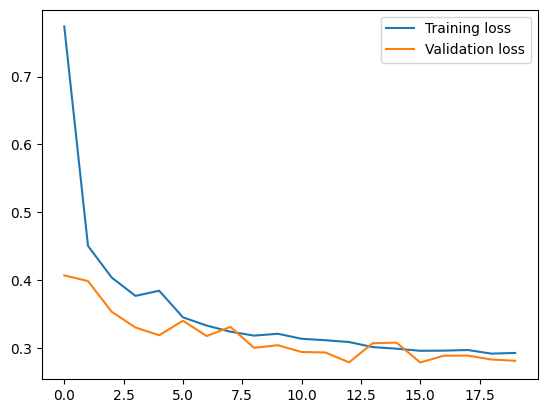

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
rmse = history.history['root_mean_squared_error']
val_rmse = history.history['val_root_mean_squared_error']

plt.plot(loss, label='Training loss')
plt.plot(val_loss, label='Validation loss')
plt.legend()
plt.show()

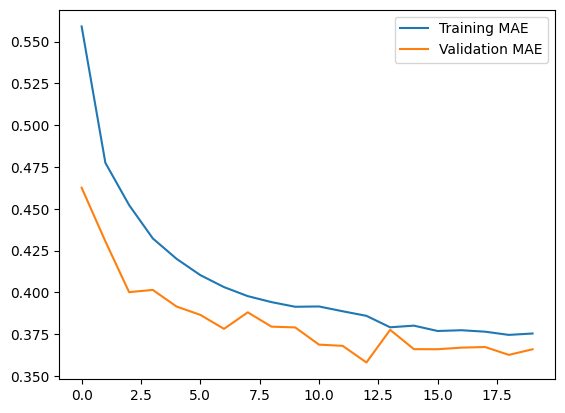

In [ ]:
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.legend()
plt.show()

In [ ]:
plt.plot(rmse, label='Training RSME')
plt.plot(val_rmse, label='Validation RMSE')
plt.legend()
plt.show()